In [198]:
from ipywidgets import interact

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 6]

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def normalize_text(txt):
    txt = txt.upper()
    return txt
   
def get_normalized_length(txt):
    length = 0
    for x in txt:
        if alphabet.count(x) >= 1:
            length += 1
    return length

def create_dictionary(txt):
    dictionary = {}
    length = get_normalized_length(txt)
    for x in list(alphabet):
        dictionary[x] = (txt.count(x)/length)*100
    return dictionary

def get_frequency_plot(txt):
    if len(txt) > 0:
        test_dict = sorted(create_dictionary(txt).items())
        keys = [item[0] for item in test_dict]
        values = [item[1] for item in test_dict]
        plt.cla()
        plt.title("Frequency Plot of Enlgish Letters")
        plt.bar(range(len(keys)), values, width=0.8, color='c', label="Your Text")
        plt.xticks([i+0.4 for i in range(len(keys))], keys)
        plt.ylabel("Letter Frequency %")
        plt.plot()
    

In [199]:
def encrypt_caesar(text, shift):
    result = ""
    text = normalize_text(text)
    for i in range(len(text)): 
        char = text[i] 
        if alphabet.count(char) < 1:
            result += char
        else:
            result += chr((ord(char) + shift-65) % 26 + 65)
    return result

In [200]:
text="Text to encrypt"
shift=1

print(encrypt_caesar(text, shift))

UFYU UP FODSZQU


<function __main__.plot_caesar_encrypted>

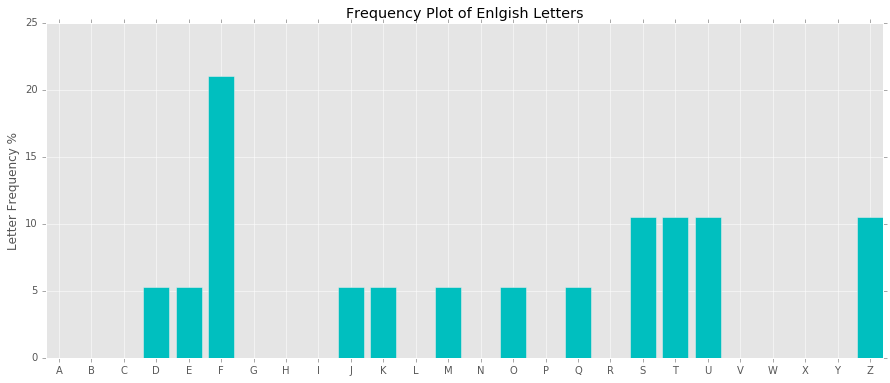

In [201]:
def plot_caesar_encrypted(text, shift):
    get_frequency_plot(encrypt_caesar(text, shift))
    
interact(plot_caesar_encrypted, text="Try changing this text", shift=(0,25))

In [144]:
def generate_key(text, key): 
    key = list(key) 
    if len(text) == len(key): 
        return(key) 
    elif len(key) > 0: 
        for i in range(get_normalized_length(text) - len(key)): 
            key.append(key[i % len(key)]) 
    return key

def encrypt_vigenere(text, key):
    text = normalize_text(text)
    key = normalize_text(key)
    key = generate_key(text, key)
    cipher_text = [] 
    key_index = 0;
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1 and len(key) > 0:
            x = (ord(text[i]) + ord(key[key_index])) % 26
            x += ord('A') 
            cipher_text.append(chr(x)) 
            key_index = key_index + 1
        else:
            cipher_text.append(text[i])
    cipher_text = ''.join(cipher_text)
    return cipher_text

In [145]:
text = "Hello World"
key = "key"

print(encrypt_vigenere(text, key))

RIJVS UYVJN


<function __main__.plot_vigenere_encrypted>

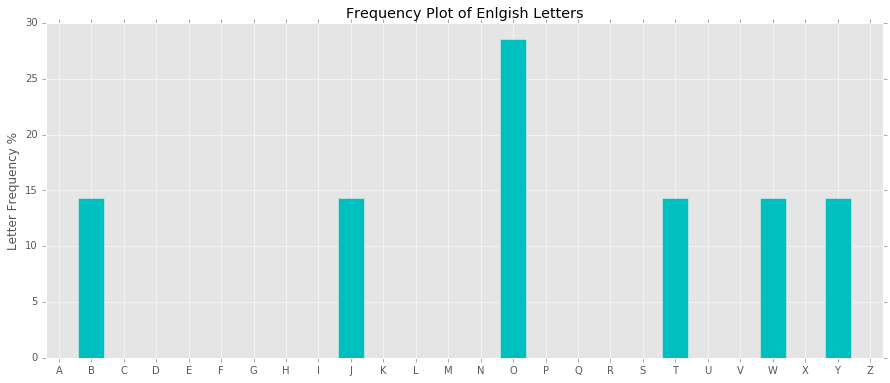

In [146]:
def plot_vigenere_encrypted(text, key):
    get_frequency_plot(encrypt_vigenere(text, key))

interact(plot_vigenere_encrypted, text="Example", key="key")

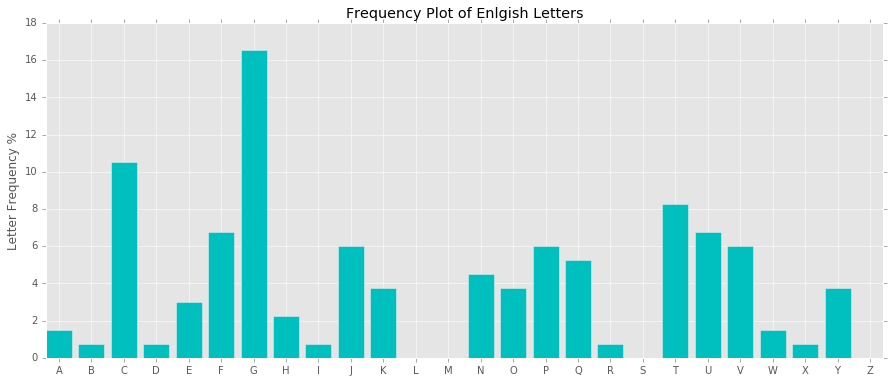

In [147]:
#ASSUMING THE CIPHERTEXT WAS GENEATED BY A KEYWORD OF LENGTH 1

#Here is a cipher text:

cipher_text = "QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

get_frequency_plot(cipher_text)


In [195]:
english_letter_frequency = [
    ('A', 8.2), 
    ('B', 1.5), 
    ('C', 2.8), 
    ('D', 4.3), 
    ('E', 12.7), 
    ('F', 2.2), 
    ('G', 2.0), 
    ('H', 6.1), 
    ('I', 7.0),
    ('J', 0.15),
    ('K', 0.8), 
    ('L', 4.0), 
    ('M', 2.4), 
    ('N', 6.7), 
    ('O', 7.5), 
    ('P', 1.9), 
    ('Q', 0.1), 
    ('R', 6.0), 
    ('S', 6.3), 
    ('T', 9.1), 
    ('U', 2.8), 
    ('V', 1.0), 
    ('W', 2.4), 
    ('X', 0.15), 
    ('Y', 2.0), 
    ('Z', 0.07)]

keys = [item[0] for item in english_letter_frequency]
values = [item[1] for item in english_letter_frequency]

def decrytp_vigenre(cipher_text, key):
    result = ""
    # traverse text
    cipher_text = normalize_text(cipher_text)
    key = normalize_text(key)
    key = generate_key(cipher_text, key)
    key_index = 0
    for i in range(len(cipher_text)): 
        char = cipher_text[i] 
        if alphabet.count(char) < 1:
            result += char
        elif len(key) > 0:
            result += chr((ord(char) - ord(key[key_index]) + 26) % 26 + ord('A'))
            key_index = key_index + 1
    return result

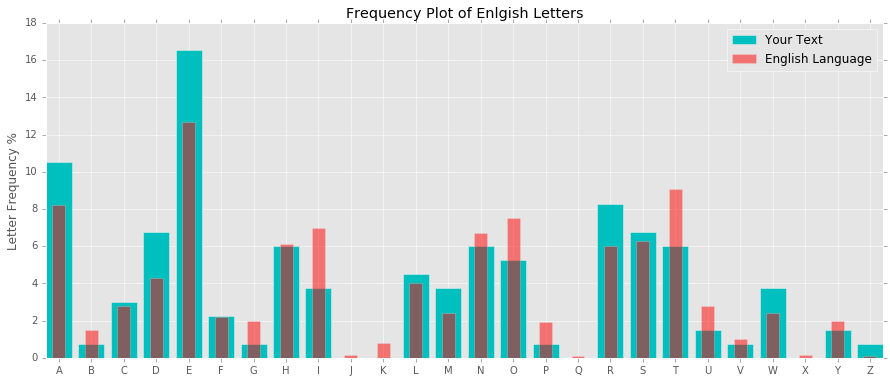

In [157]:
def plot_vigenre_decrypted(cipher_text, key):
    get_frequency_plot(decrytp_vigenre(cipher_text, key))
    plt.bar([i+0.2 for i in range(len(keys))], values, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted, cipher_text=fixed(cipher_text), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

In [154]:
key='C'
print(decrytp_vigenre(cipher_text, key))

ONCE THERE WAS A GIRL NAMED ETHEL, WHO WAS A DISCRETE MATHS WIZ AT BRISTOL. THEN HER PROFESSOR DECIDED HER NAME WAS AN OLD LADY'S NAME AND MADE FUN OF HER EVERY LECTURE


KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH.

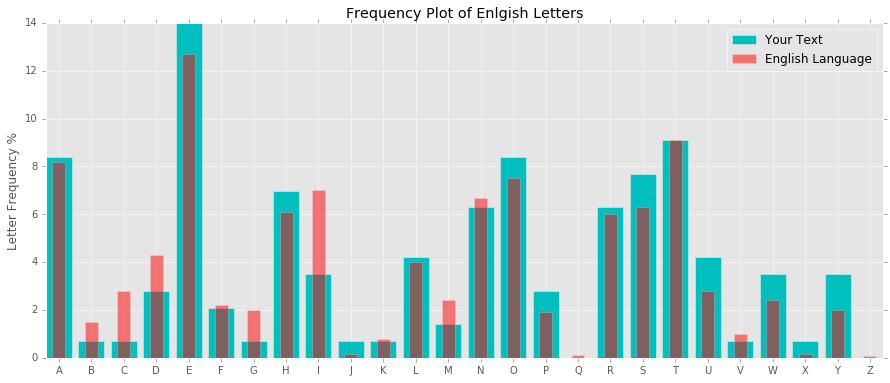

In [191]:
story = "KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH."

def encrypted_with_key(text, key_index, key_length=3):
    result = ""
    index = 0
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1:
            if index%key_length == key_index%key_length:
                result += text[i]
            index += 1
    return result

def plot_vigenre_decrypted_key_at_index(cipher_text, key_index, key):
    text_at_index = encrypted_with_key(story, key_index)
    get_frequency_plot(decrytp_vigenre(text_at_index, key))
    plt.bar([i+0.2 for i in range(len(keys))], values, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(0), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])


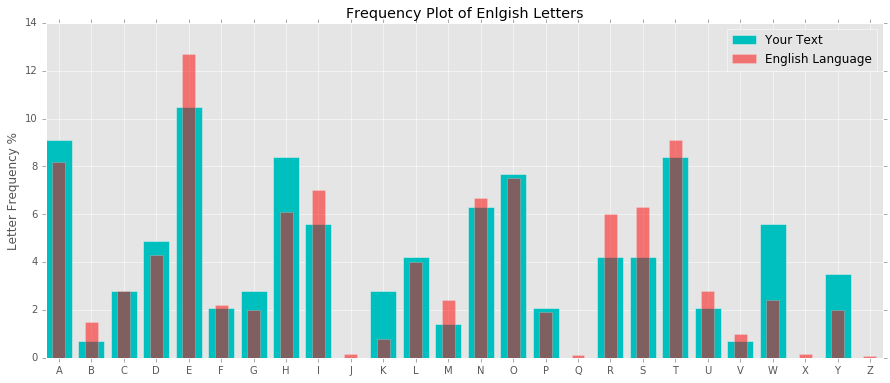

In [192]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(1), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

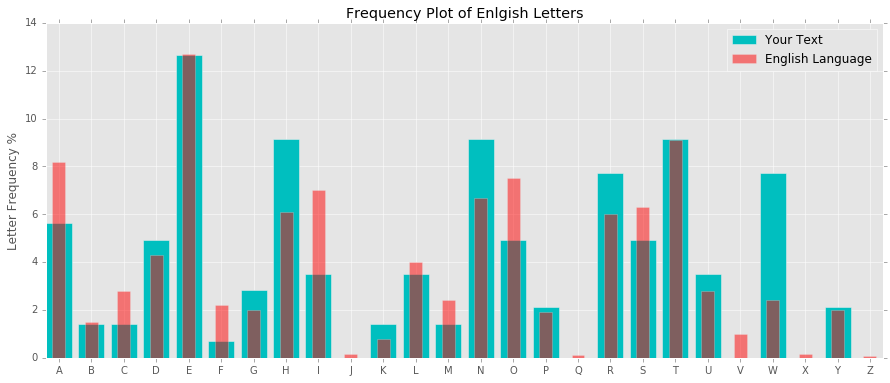

In [193]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(2), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

In [197]:
key="key"

print(decrytp_vigenre(story, key))

ALL CHILDREN, EXCEPT ONE, GROW UP. THEY SOON KNOW THAT THEY WILL GROW UP, AND THE WAY WENDY KNEW WAS THIS. ONE DAY WHEN SHE WAS TWO YEARS OLD SHE WAS PLAYING IN A GARDEN, AND SHE PLUCKED ANOTHER FLOWER AND RAN WITH IT TO HER MOTHER. I SUPPOSE SHE MUST HAVE LOOKED RATHER DELIGHTFUL, FOR MRS. DARLING PUT HER HAND TO HER HEART AND CRIED, “OH, WHY CAN'T YOU REMAIN LIKE THIS FOR EVER!” THIS WAS ALL THAT PASSED BETWEEN THEM ON THE SUBJECT, BUT HENCEFORTH WENDY KNEW THAT SHE MUST GROW UP. YOU ALWAYS KNOW AFTER YOU ARE TWO. TWO IS THE BEGINNING OF THE END.
